In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [19]:
import zipfile

path = "../Datasets/jones_gabriel.zip"
zip_object = zipfile.ZipFile(file=path,mode="r")
zip_object.extractall("./")
zip_object.close()

In [20]:
import os

print(os.listdir("jones_gabriel/")[:2])  # List all file in that dir

['person.2.5.jpg', 'person.2.14.jpg']


In [21]:
def get_image_data(data):
    paths = [os.path.join(f"jones_gabriel/",f) for f in os.listdir(f"jones_gabriel/")]
    faces = []
    ids = []
    for path in paths:
        image = Image.open(path).convert("L") # Single chanel
        image_np = np.array(image,"uint8")  # Convert to numpy
        id_ = int(os.path.split(path)[1].split(".")[1])
        ids.append(id_)
        faces.append(image_np)
    ids = np.array(ids)
    return ids,faces 

In [22]:
ids,faces = get_image_data("")
len(ids),len(faces)

(50, 50)

### LBPH: Local Binary Patterns Histograms

In [23]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4,
                                                     neighbors=14,
                                                     grid_x=9,
                                                     grid_y=9)
lbph_classifier.train(faces,ids)
lbph_classifier.write("LBPH/lbph_classifier.yml")

In [24]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read("LBPH/lbph_classifier.yml")

In [26]:
test_image = "jones_gabriel/person.1.1.jpg"
image = Image.open(test_image).convert("L")
image_np = np.array(image,"uint8")
prediction,confidence = lbph_face_classifier.predict(image_np)
expected_output = int(test_image[23:24])
prediction,expected_output

(1, 1)

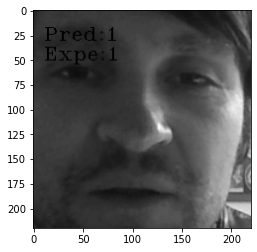

In [27]:
cv2.putText(image_np,f"Pred:{prediction}",
            (10,30),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            1,(0,255,0))
cv2.putText(image_np,f"Expe:{expected_output}",
            (10,50),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            1,(0,255,0))
plt.imshow(image_np,cmap="gray")
plt.show()

In [28]:
def predict_test_image(image_np,id_):
    prediction,confidence = lbph_face_classifier.predict(image_np)
    expected_output = id_
    predicted.append(prediction)
    expected.append(expected_output)
    cv2.putText(image_np,f"Pred:{prediction}",
                (10,30),
                cv2.FONT_HERSHEY_COMPLEX_SMALL,
                1,(0,255,0))
    cv2.putText(image_np,f"Expe:{expected_output}",
                (10,50),
                cv2.FONT_HERSHEY_COMPLEX_SMALL,
                1,(0,255,0))
    plt.imshow(image_np,cmap="gray")
    plt.show()
    return expected_output == prediction

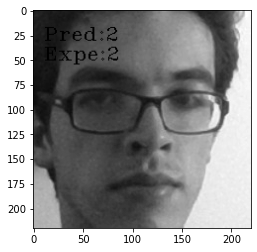

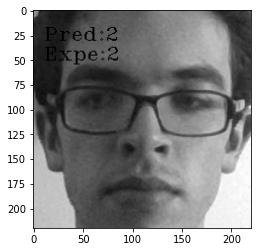

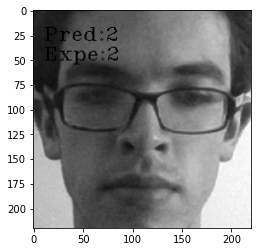

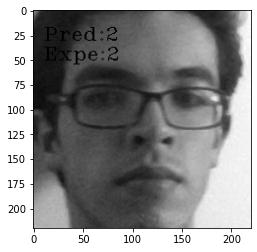

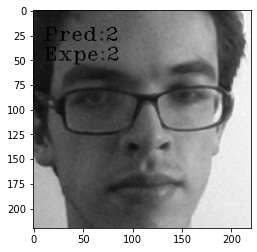

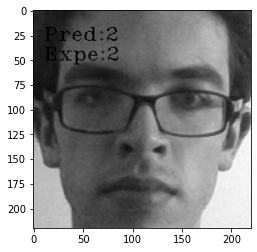

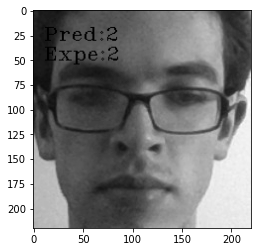

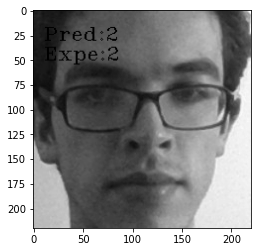

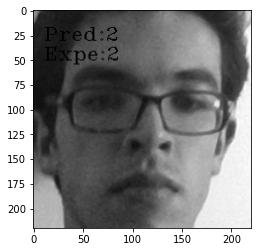

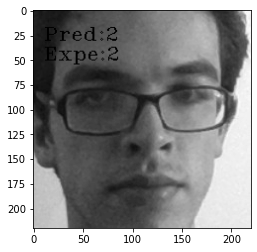

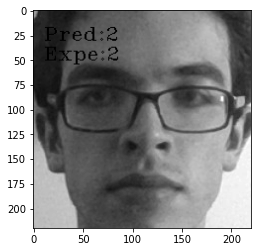

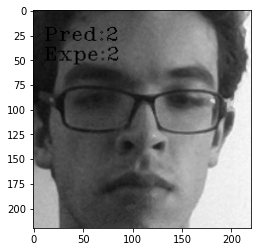

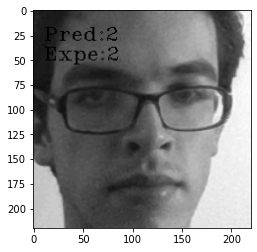

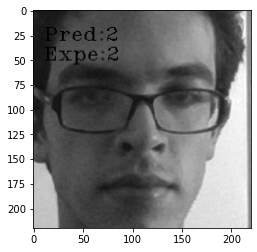

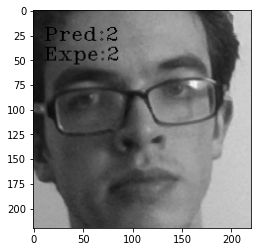

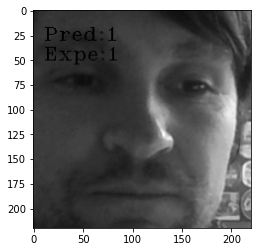

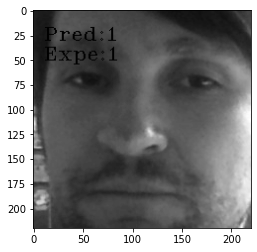

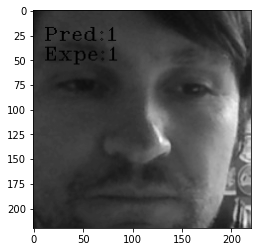

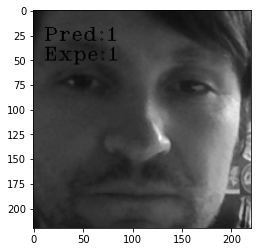

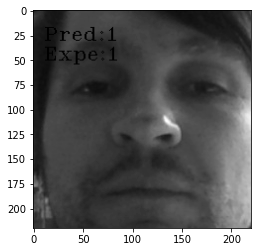

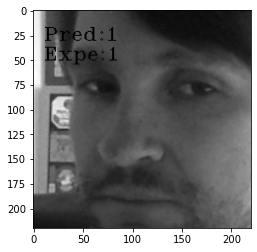

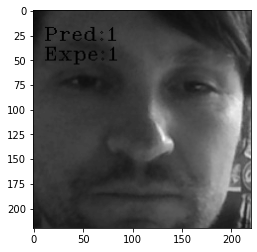

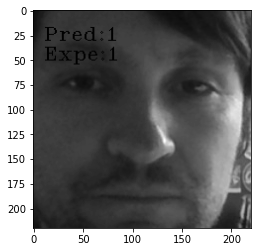

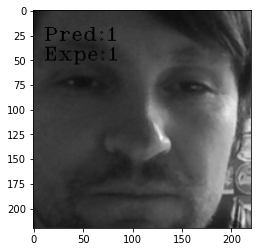

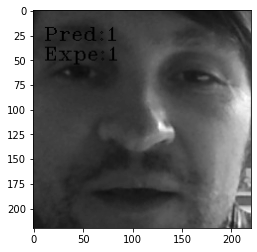

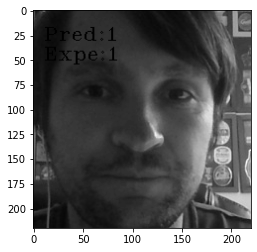

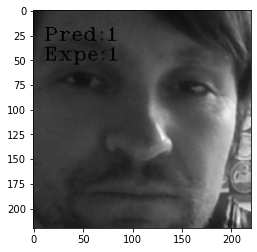

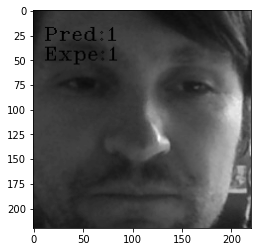

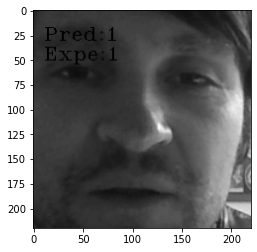

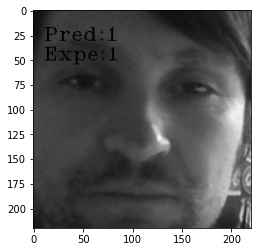

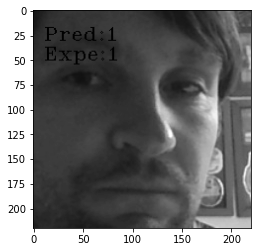

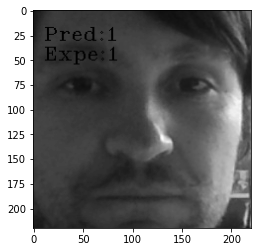

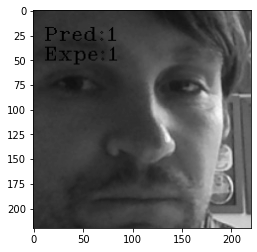

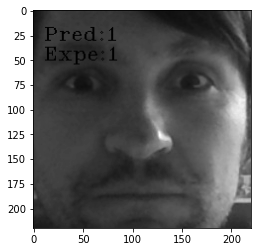

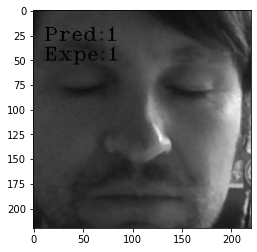

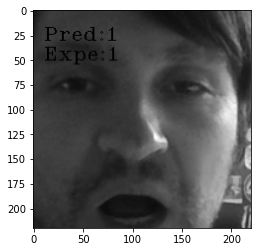

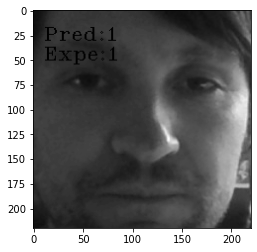

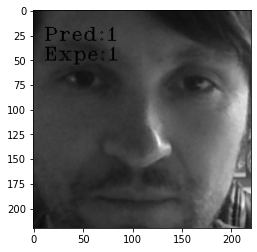

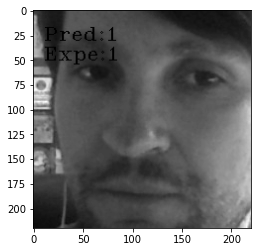

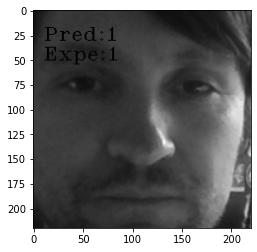

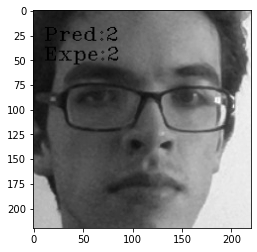

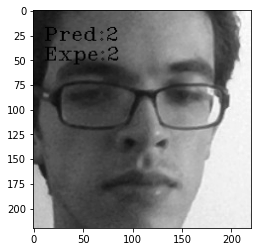

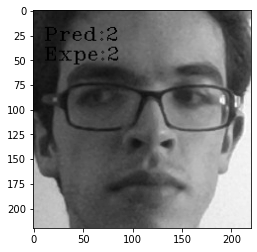

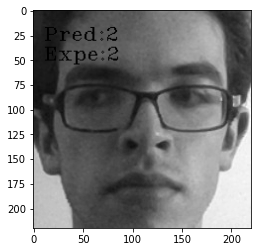

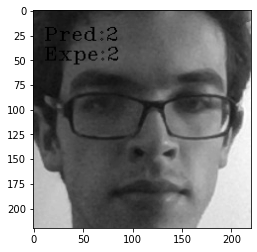

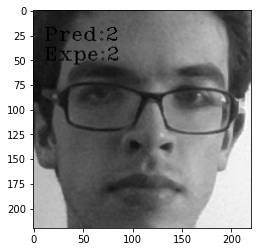

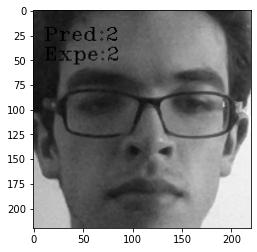

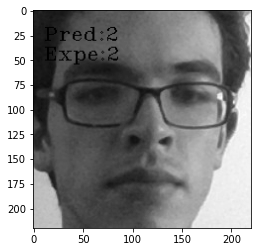

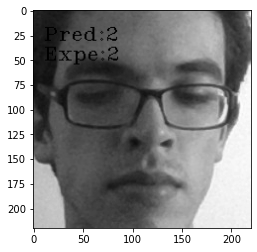

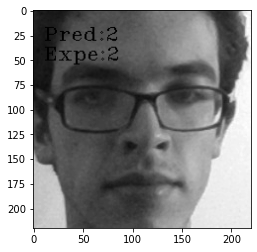

In [29]:
ids,faces = get_image_data("test")
evaluate_list = []
predicted = []
expected = []
for i,face in enumerate(faces):
    result = predict_test_image(face,ids[i])
    evaluate_list.append(result)

In [30]:
acc = evaluate_list.count(True)/len(evaluate_list)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


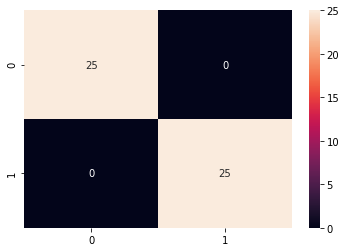

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn

cm = confusion_matrix(expected,predicted)
seaborn.heatmap(cm,annot=True);

### Dlib: facial points

In [33]:
import dlib

face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("../Weights/shape_predictor_68_face_landmarks.dat")

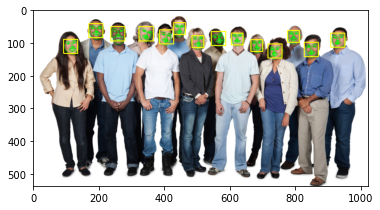

In [34]:
image = cv2.imread("../Images/people2.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
face_detection = face_detector(image,1)
for face in face_detection:
    points = points_detector(image,face)
    for point in points.parts():
        cv2.circle(image,(point.x,point.y),2,(0,255,0),1)
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(image,(l,t),(r,b),(255,255,0),2)
plt.imshow(image)
plt.show()

### Dlib: facial descriptors

In [35]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("../Weights/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor = dlib.face_recognition_model_v1("../Weights/dlib_face_recognition_resnet_model_v1.dat")

jones_gabriel/person.2.5.jpg


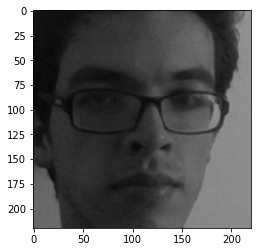

jones_gabriel/person.2.14.jpg


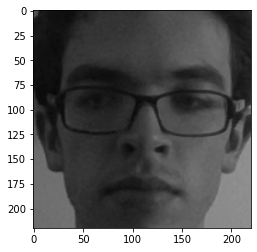

jones_gabriel/person.2.15.jpg


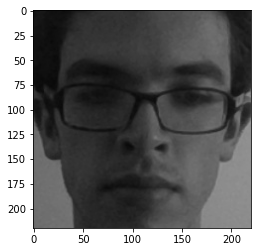

jones_gabriel/person.2.4.jpg


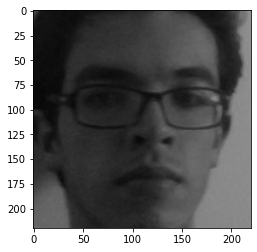

jones_gabriel/person.2.6.jpg


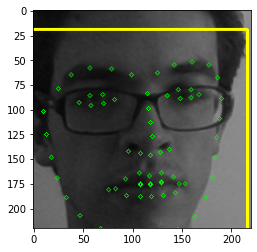

jones_gabriel/person.2.17.jpg


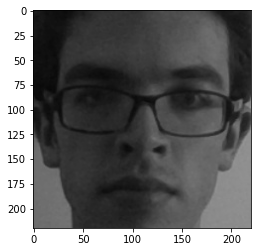

jones_gabriel/person.2.16.jpg


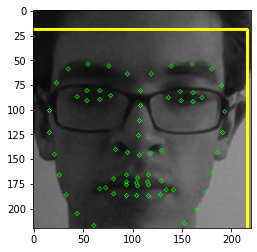

jones_gabriel/person.2.7.jpg


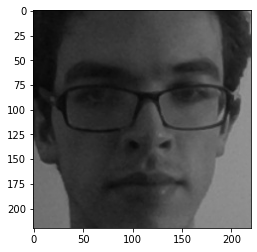

jones_gabriel/person.2.3.jpg


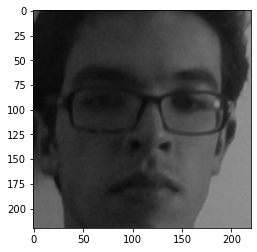

jones_gabriel/person.2.12.jpg


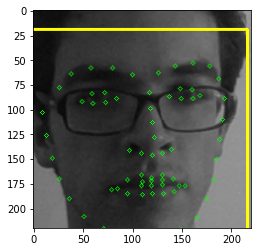

jones_gabriel/person.2.13.jpg


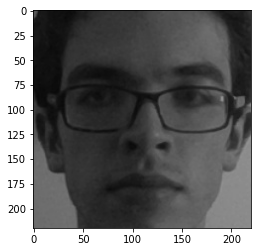

jones_gabriel/person.2.2.jpg


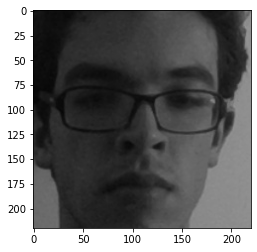

jones_gabriel/person.2.11.jpg


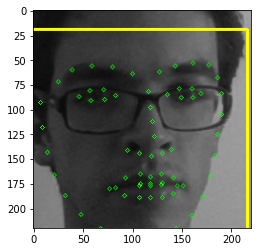

jones_gabriel/person.2.10.jpg


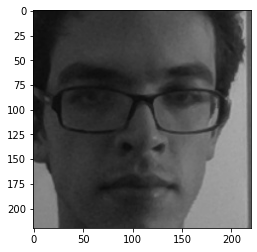

jones_gabriel/person.2.1.jpg


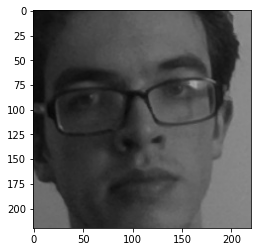

jones_gabriel/person.1.4.jpg


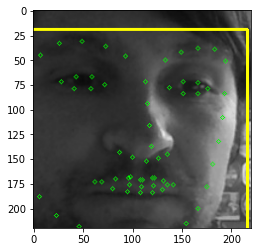

jones_gabriel/person.1.5.jpg


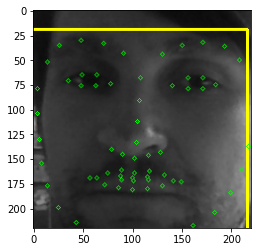

jones_gabriel/person.1.19.jpg


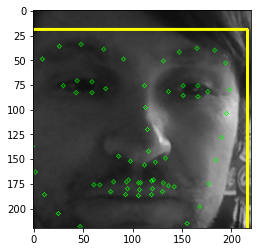

jones_gabriel/person.1.25.jpg


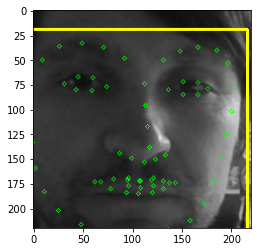

jones_gabriel/person.1.7.jpg


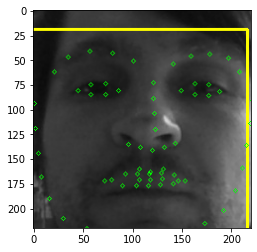

jones_gabriel/person.1.6.jpg


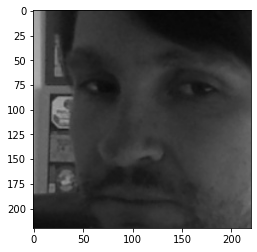

jones_gabriel/person.1.24.jpg


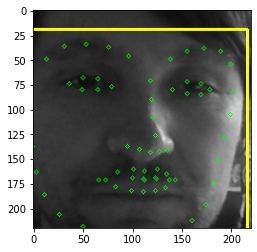

jones_gabriel/person.1.18.jpg


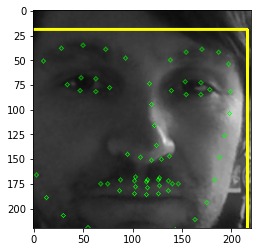

jones_gabriel/person.1.20.jpg


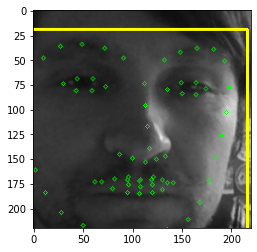

jones_gabriel/person.1.2.jpg


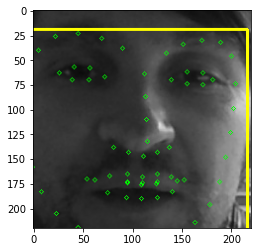

jones_gabriel/person.1.3.jpg


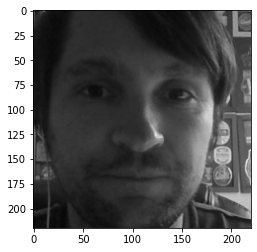

jones_gabriel/person.1.21.jpg


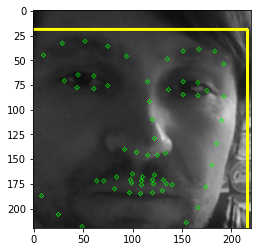

jones_gabriel/person.1.23.jpg


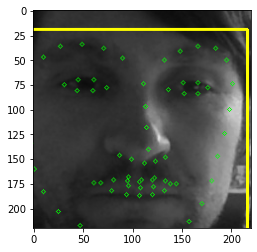

jones_gabriel/person.1.1.jpg


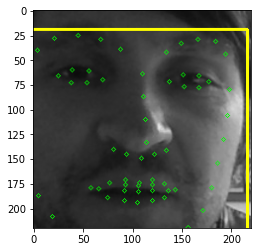

jones_gabriel/person.1.22.jpg


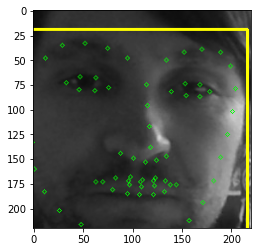

jones_gabriel/person.1.13.jpg


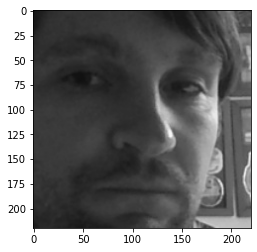

jones_gabriel/person.1.12.jpg


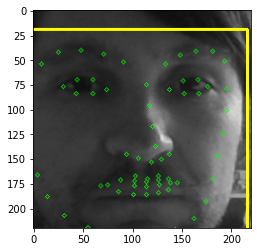

jones_gabriel/person.1.10.jpg


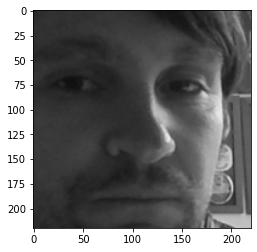

jones_gabriel/person.1.11.jpg


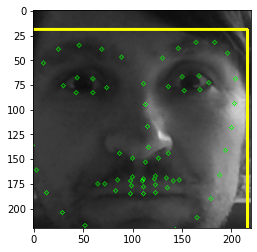

jones_gabriel/person.1.15.jpg


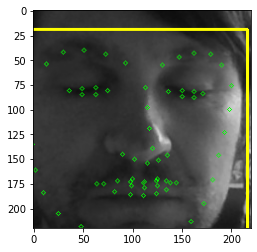

jones_gabriel/person.1.14.jpg


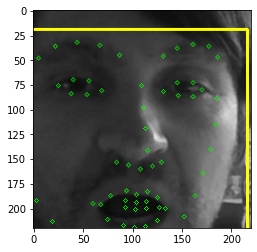

jones_gabriel/person.1.16.jpg


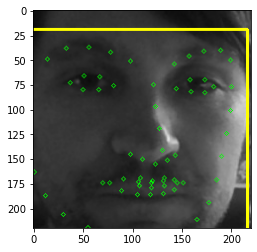

jones_gabriel/person.1.8.jpg


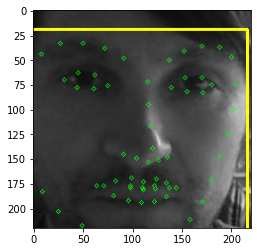

jones_gabriel/person.1.9.jpg


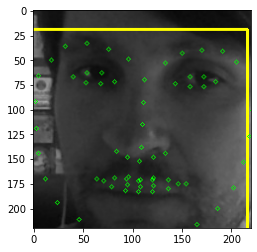

jones_gabriel/person.1.17.jpg


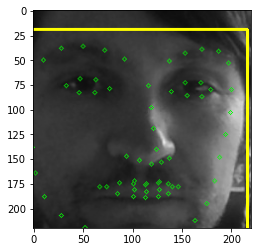

jones_gabriel/person.2.21.jpg


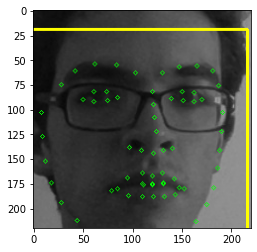

jones_gabriel/person.2.20.jpg


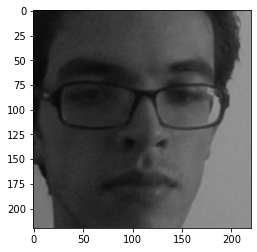

jones_gabriel/person.2.22.jpg


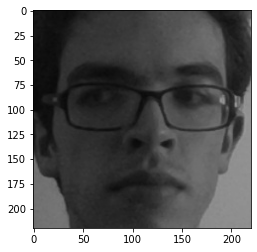

jones_gabriel/person.2.23.jpg


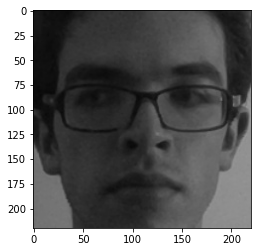

jones_gabriel/person.2.9.jpg


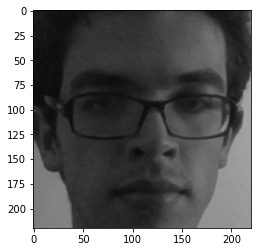

jones_gabriel/person.2.18.jpg


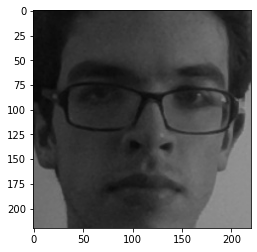

jones_gabriel/person.2.24.jpg


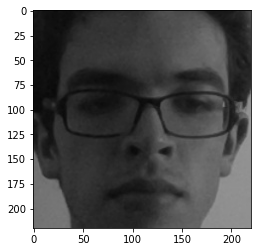

jones_gabriel/person.2.25.jpg


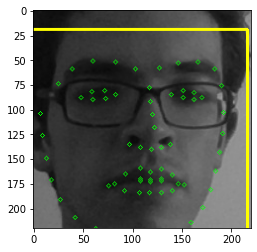

jones_gabriel/person.2.19.jpg


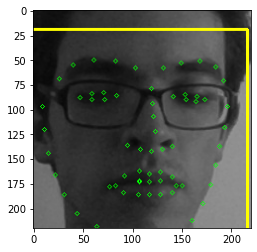

jones_gabriel/person.2.8.jpg


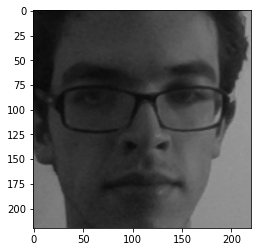

In [36]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join("jones_gabriel/",f) for f in os.listdir("jones_gabriel")]
for path in paths:
    print(path)
    image = Image.open(path).convert("RGB")
    image_np = np.array(image,"uint8")
    face_detection = face_detector(image_np,1)
    for face in face_detection:
        l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
        cv2.rectangle(image_np,(l,t),(r,b),(255,255,0),2)
        points = points_detector(image_np,face)
        for point in points.parts():
            cv2.circle(image_np,(point.x,point.y),2,(0,255,0),1)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np,points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor,dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis,:]
    if face_descriptors is None:
        face_descriptors = face_descriptor
    else:
        face_descriptors = np.concatenate((face_descriptors,face_descriptor),axis=0)
    index[idx] = path
    idx += 1
    plt.imshow(image_np)
    plt.show() 

In [37]:
index

{0: 'jones_gabriel/person.2.5.jpg',
 1: 'jones_gabriel/person.2.14.jpg',
 2: 'jones_gabriel/person.2.15.jpg',
 3: 'jones_gabriel/person.2.4.jpg',
 4: 'jones_gabriel/person.2.6.jpg',
 5: 'jones_gabriel/person.2.17.jpg',
 6: 'jones_gabriel/person.2.16.jpg',
 7: 'jones_gabriel/person.2.7.jpg',
 8: 'jones_gabriel/person.2.3.jpg',
 9: 'jones_gabriel/person.2.12.jpg',
 10: 'jones_gabriel/person.2.13.jpg',
 11: 'jones_gabriel/person.2.2.jpg',
 12: 'jones_gabriel/person.2.11.jpg',
 13: 'jones_gabriel/person.2.10.jpg',
 14: 'jones_gabriel/person.2.1.jpg',
 15: 'jones_gabriel/person.1.4.jpg',
 16: 'jones_gabriel/person.1.5.jpg',
 17: 'jones_gabriel/person.1.19.jpg',
 18: 'jones_gabriel/person.1.25.jpg',
 19: 'jones_gabriel/person.1.7.jpg',
 20: 'jones_gabriel/person.1.6.jpg',
 21: 'jones_gabriel/person.1.24.jpg',
 22: 'jones_gabriel/person.1.18.jpg',
 23: 'jones_gabriel/person.1.20.jpg',
 24: 'jones_gabriel/person.1.2.jpg',
 25: 'jones_gabriel/person.1.3.jpg',
 26: 'jones_gabriel/person.1.21.jpg

In [39]:
np.linalg.norm(face_descriptors[30]-face_descriptors[21])

0.4624387845844528

In [40]:
np.linalg.norm(face_descriptors[18]-face_descriptors[21])

0.20606845051127967

In [41]:
np.linalg.norm(face_descriptors[0]-face_descriptors,axis=1)

array([0.        , 0.        , 0.        , 0.        , 0.61629282,
       0.67496323, 0.59134704, 0.6494722 , 0.62395076, 0.60273313,
       0.69304364, 0.65191517, 0.59318573, 0.69028818, 0.64895069,
       0.63292955, 0.65560878, 0.61755367, 0.64143374, 0.65963928,
       0.70816448, 0.66235647, 0.65239196, 0.64831443, 0.61455424,
       0.71156663, 0.64394306, 0.62771056, 0.63989051, 0.64458742,
       0.73554774, 0.63545586, 0.69404386, 0.63654066, 0.65633889,
       0.62367368, 0.62954459, 0.65470079, 0.68099239, 0.65314472,
       0.61985153, 0.68062206, 0.68480419, 0.67934137, 0.66986609,
       0.66524084, 0.67520785, 0.6168905 , 0.6248406 , 0.70309282])

In [42]:
np.argmin(np.linalg.norm(face_descriptors[0]-face_descriptors[1:],axis=1))

0

In [45]:
np.linalg.norm(face_descriptors[0]-face_descriptors[1:],axis=1)[1]

0.0

### Dlib: detecting faces

jones_gabriel/person.2.5.jpg


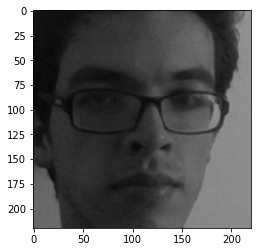

jones_gabriel/person.2.14.jpg


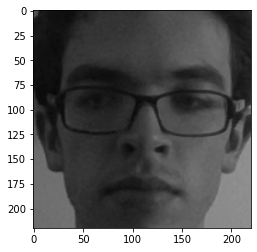

jones_gabriel/person.2.15.jpg


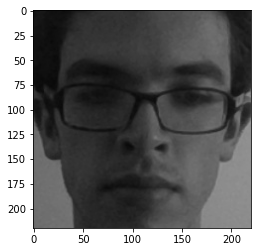

jones_gabriel/person.2.4.jpg


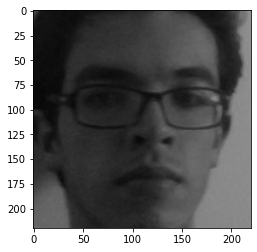

jones_gabriel/person.2.6.jpg


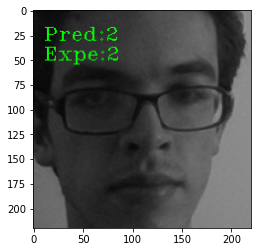

jones_gabriel/person.2.17.jpg


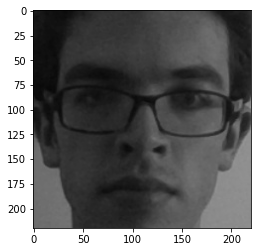

jones_gabriel/person.2.16.jpg


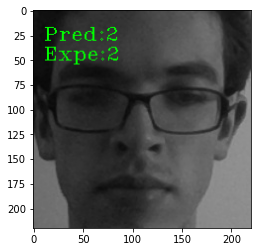

jones_gabriel/person.2.7.jpg


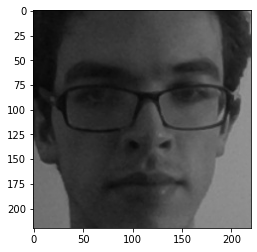

jones_gabriel/person.2.3.jpg


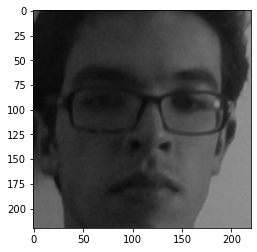

jones_gabriel/person.2.12.jpg


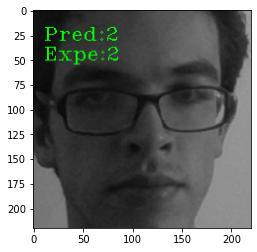

jones_gabriel/person.2.13.jpg


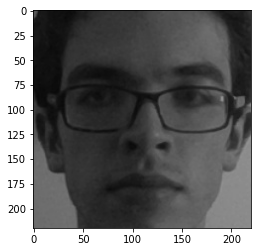

jones_gabriel/person.2.2.jpg


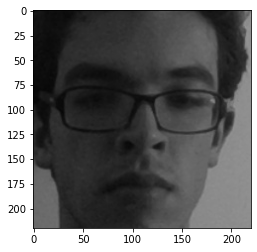

jones_gabriel/person.2.11.jpg


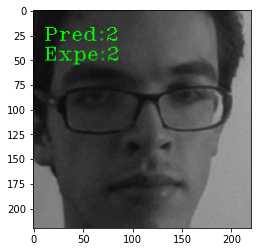

jones_gabriel/person.2.10.jpg


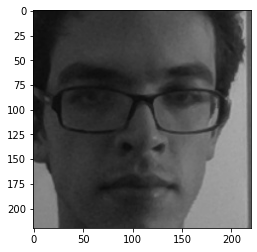

jones_gabriel/person.2.1.jpg


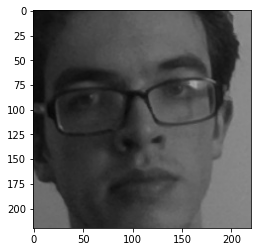

jones_gabriel/person.1.4.jpg


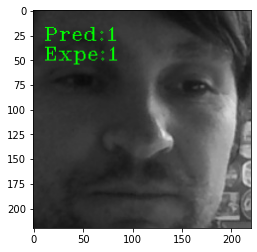

jones_gabriel/person.1.5.jpg


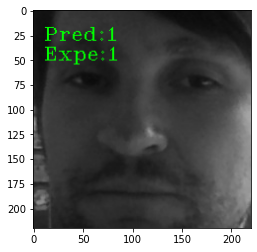

jones_gabriel/person.1.19.jpg


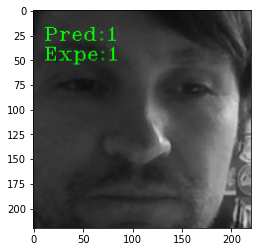

jones_gabriel/person.1.25.jpg


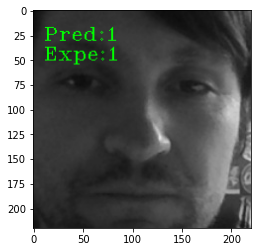

jones_gabriel/person.1.7.jpg


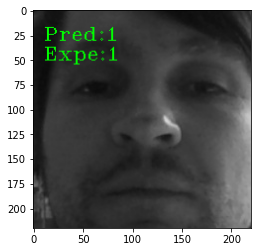

jones_gabriel/person.1.6.jpg


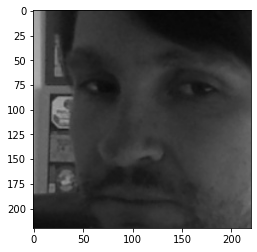

jones_gabriel/person.1.24.jpg


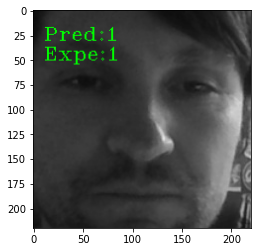

jones_gabriel/person.1.18.jpg


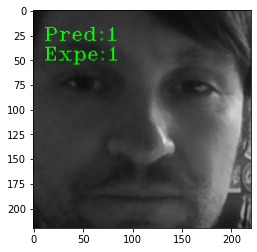

jones_gabriel/person.1.20.jpg


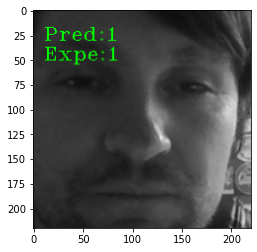

jones_gabriel/person.1.2.jpg


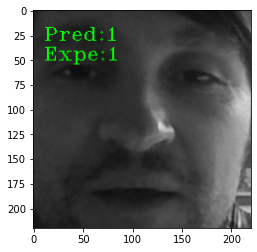

jones_gabriel/person.1.3.jpg


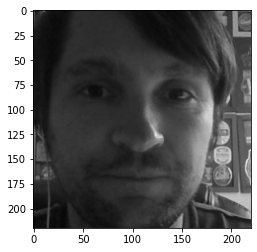

jones_gabriel/person.1.21.jpg


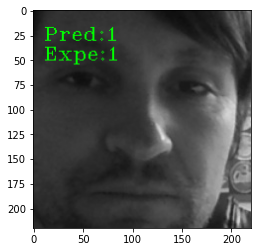

jones_gabriel/person.1.23.jpg


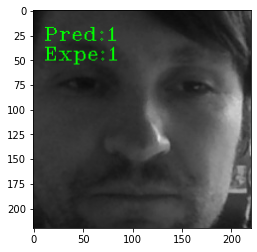

jones_gabriel/person.1.1.jpg


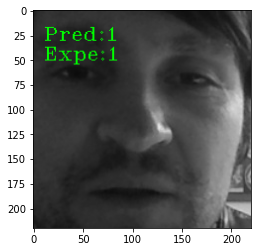

jones_gabriel/person.1.22.jpg


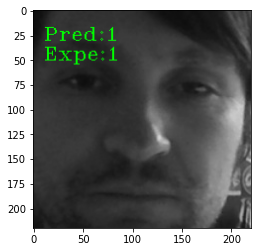

jones_gabriel/person.1.13.jpg


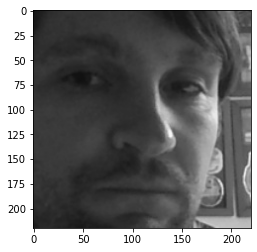

jones_gabriel/person.1.12.jpg


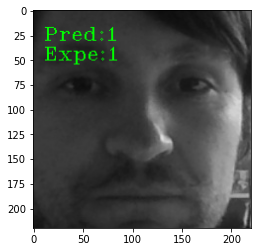

jones_gabriel/person.1.10.jpg


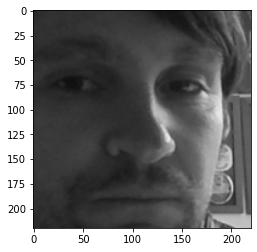

jones_gabriel/person.1.11.jpg


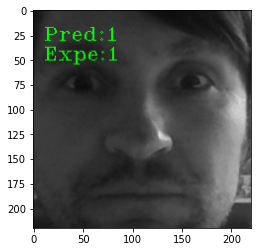

jones_gabriel/person.1.15.jpg


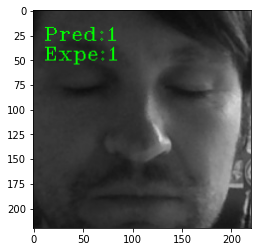

jones_gabriel/person.1.14.jpg


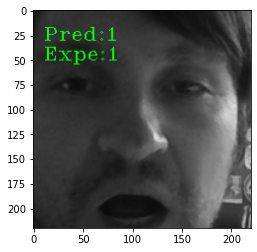

jones_gabriel/person.1.16.jpg


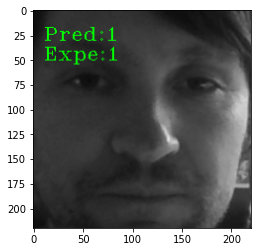

jones_gabriel/person.1.8.jpg


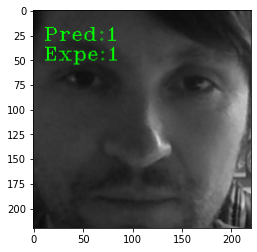

jones_gabriel/person.1.9.jpg


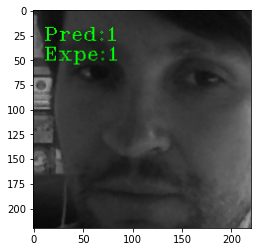

jones_gabriel/person.1.17.jpg


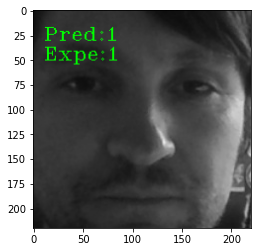

jones_gabriel/person.2.21.jpg


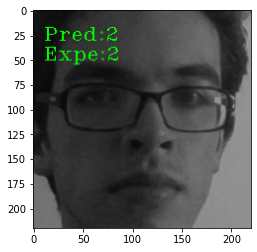

jones_gabriel/person.2.20.jpg


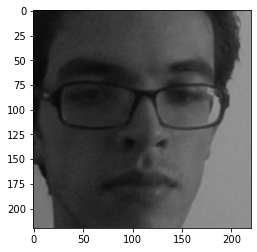

jones_gabriel/person.2.22.jpg


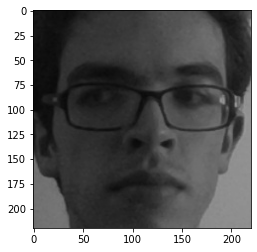

jones_gabriel/person.2.23.jpg


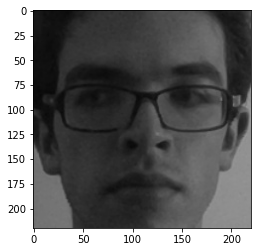

jones_gabriel/person.2.9.jpg


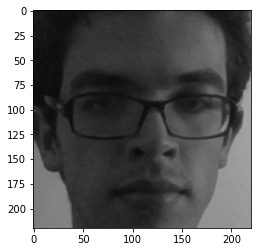

jones_gabriel/person.2.18.jpg


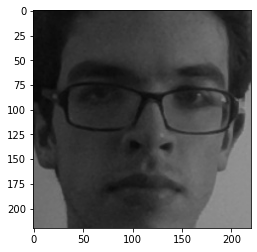

jones_gabriel/person.2.24.jpg


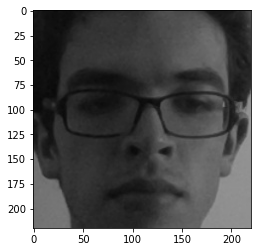

jones_gabriel/person.2.25.jpg


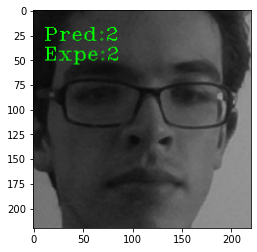

jones_gabriel/person.2.19.jpg


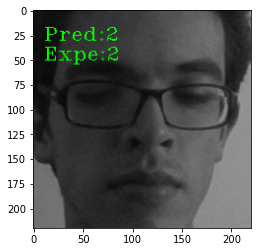

jones_gabriel/person.2.8.jpg


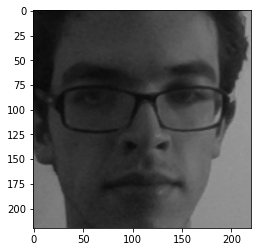

In [50]:
threshold = 0.5
predictions = []
expecteds = []

paths = [os.path.join("jones_gabriel/",f) for f in os.listdir("jones_gabriel/")]
for path in paths:
    print(path)
    image = Image.open(path).convert("RGB")
    image_np = np.array(image,"uint8")
    face_detection = face_detector(image_np,1)
    for face in face_detection:
        points = points_detector(image_np,face)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np,points)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np,points)
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor,dtype=np.float64)
        face_descriptor = face_descriptor[np.newaxis,:]
        distances = np.linalg.norm(face_descriptor-face_descriptors,axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= threshold:
            name_pred = int(os.path.split(index[min_index])[1].split(".")[1])
        else:
            name_pred = "Not identified"
        name_real = int(os.path.split(path)[1].split(".")[1])
        predictions.append(name_pred)
        expecteds.append(name_real)
        cv2.putText(image_np,f"Pred:{name_pred}",(10,30),
                    cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        cv2.putText(image_np,f"Expe:{name_real}",(10,50),
                    cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    plt.imshow(image_np)
    plt.show() 

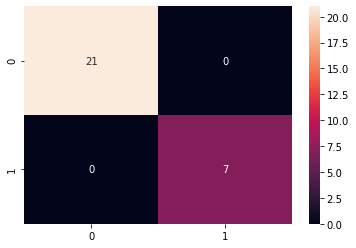

In [51]:
cm = confusion_matrix(expecteds,predictions)
seaborn.heatmap(cm,annot=True);

In [52]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(expecteds,predictions)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 100.00%
